# Preparación de datos: Industrial Fault Detection


## Descripción del dataset


- Fuente: Kaggle [`programmer3/industrial-fault-detection-dataset`](https://www.kaggle.com/datasets/programmer3/industrial-fault-detection-dataset/). Detección automática de fallos en aplicaciones de la Industria 4.0 utilizando sensores IoT.

- Objetivo: predecir `Fault_Type` (0 = sin fallo, otros valores representan tipos de fallo) a partir de variables de proceso y componentes espectrales de señales (FFT).

- Filas: 1000 muestras.

- Columnas (37 features + 1 objetivo):

  - Variables de proceso continuas: `Temperature`, `Vibration`, `Pressure`, `Flow_Rate`, `Current`, `Voltage`.

  - Componentes de frecuencia (FFT) para cada sensor: `FFT_Temp_0-9`, `FFT_Vib_0-9`, `FFT_Pres_0-9` (30 columnas en total).

  - Objetivo: `Fault_Type` (entero).



## Carga e inspección inicial


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 4)

DATA_PATH = "data/Industrial_fault_detection.csv"
df = pd.read_csv(DATA_PATH)
print(f"Filas: {df.shape[0]:,}  |  Columnas: {df.shape[1]}")
df.head()

Filas: 1,000  |  Columnas: 37


,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,FFT_Vib_1,FFT_Pres_1,FFT_Temp_2,FFT_Vib_2,FFT_Pres_2,FFT_Temp_3,FFT_Vib_3,FFT_Pres_3,FFT_Temp_4,FFT_Vib_4,FFT_Pres_4,FFT_Temp_5,FFT_Vib_5,FFT_Pres_5,FFT_Temp_6,FFT_Vib_6,FFT_Pres_6,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,46.0061,2.0384,56.7758,6.1844,12.4095,215.7624,772.4031,32.4365,971.8053,3.7606,0.7340,30.8746,8.7876,1.1573,4.3689,22.0885,1.2900,33.9704,2.5275,0.4367,23.4286,2.2032,1.6654,25.8206,2.5275,0.4367,23.4286,22.0885,1.2900,33.9704,8.7876,1.1573,4.3689,3.7606,0.7340,30.8746,0
1,62.5292,2.5737,76.1598,8.2792,14.9064,215.4659,767.6024,32.3956,962.4815,8.3651,0.7246,27.2683,12.5535,1.1308,8.1044,19.4903,1.2831,41.3641,6.9389,0.4133,25.0722,7.0038,1.6244,35.1444,6.9389,0.4133,25.0722,19.4903,1.2831,41.3641,12.5535,1.1308,8.1044,8.3651,0.7246,27.2683,0
2,77.2950,3.2435,92.3726,9.1728,15.0541,202.0436,765.9651,32.0320,956.2995,9.5598,0.9344,30.1371,12.2918,0.8034,13.2624,21.1090,0.9723,43.4171,5.4635,0.5342,20.1791,5.3665,1.9880,28.9623,5.4635,0.5342,20.1791,21.1090,0.9723,43.4171,12.2918,0.8034,13.2624,9.5598,0.9344,30.1371,0
3,76.5642,3.1429,94.1496,13.7754,16.4179,216.6991,763.9364,33.0399,956.5322,10.2519,0.1692,29.9199,10.3211,1.1399,13.2934,20.8637,0.6063,43.6489,6.5774,1.1686,19.9480,7.3951,2.9958,28.7295,6.5774,1.1686,19.9480,20.8637,0.6063,43.6489,10.3211,1.1399,13.2934,10.2519,0.1692,29.9199,0
4,78.2816,3.1400,94.4410,11.1131,10.8994,227.3283,746.7549,33.0187,950.2128,18.3131,0.1727,36.0651,14.4416,1.1491,7.1494,8.1633,0.6273,45.4618,17.8478,1.1783,14.7549,9.7864,3.0169,22.4101,17.8478,1.1783,14.7549,8.1633,0.6273,45.4618,14.4416,1.1491,7.1494,18.3131,0.1727,36.0651,3


### Estructura y tipos de datos


Revisar tipo de datos y presencia de duplicados.

In [2]:
summary = pd.DataFrame({
    "no_nulos": df.count(),
    "faltante%": df.isna().mean(),
    "dtype": df.dtypes
})
summary

,no_nulos,faltante%,dtype
Temperature,1000,0.0,float64
Vibration,1000,0.0,float64
Pressure,1000,0.0,float64
Flow_Rate,1000,0.0,float64
Current,1000,0.0,float64
Voltage,1000,0.0,float64
FFT_Temp_0,1000,0.0,float64
FFT_Vib_0,1000,0.0,float64
FFT_Pres_0,1000,0.0,float64
FFT_Temp_1,1000,0.0,float64


In [3]:
# Duplicados a nivel de fila
dup_rows = df.duplicated().sum()
print(f"Filas duplicadas: {dup_rows}")

Filas duplicadas: 0


### Exploración inicial de valores


Estadísticas descriptivas básicas y balance de clases para entender el rango y escala de las variables.

In [4]:
desc = df.describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]].round(3)
desc.head()

,mean,std,min,25%,50%,75%,max
Temperature,75.005,2.590,45.642,73.646,75.025,76.461,82.165
Vibration,3.032,0.229,1.621,2.890,3.041,3.183,3.784
Pressure,99.941,4.786,56.776,97.210,99.960,102.804,112.127
Flow_Rate,9.963,2.054,4.141,8.525,10.000,11.334,16.486
Current,14.852,2.977,5.470,12.952,14.945,16.917,24.339


In [5]:
fault_counts = df["Fault_Type"].value_counts().sort_index()
fault_summary = pd.DataFrame({
    "count": fault_counts,
    "pct": (fault_counts / len(df) * 100).round(2)
})
fault_summary

,count,pct
Fault_Type,,
0,725,72.5
1,91,9.1
2,95,9.5
3,89,8.9


### Valores faltantes y columnas constantes


Buscamos columnas con nulos o variación nula para decidir imputación o eliminación.

In [6]:
missing_cols = summary[summary["faltante%"] > 0]
missing_cols

constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Columnas con una sola categoría/valor: {constant_cols if constant_cols else 'ninguna'}")

Columnas con una sola categoría/valor: ninguna


## Limpieza y preprocesamiento


Eliminación de duplicados, separación de variables, estandarización y división train/test.
En este caso no hay duplicados a eliminar realmente.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Eliminación conceptual de duplicados (no hay)
before = len(df)
df_clean = df.drop_duplicates().copy()
removed = before - len(df_clean)
print(f"Duplicados eliminados: {removed}")

X = df_clean.drop(columns=["Fault_Type"])
y = df_clean["Fault_Type"]

numeric_cols = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[("scale", StandardScaler(), numeric_cols)],
    remainder="drop",)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Duplicados eliminados: 0
Train: (800, 36), Test: (200, 36)


## Exploración inicial rápida


Graficos básicos para evaluar balance de clases y rangos de variables.

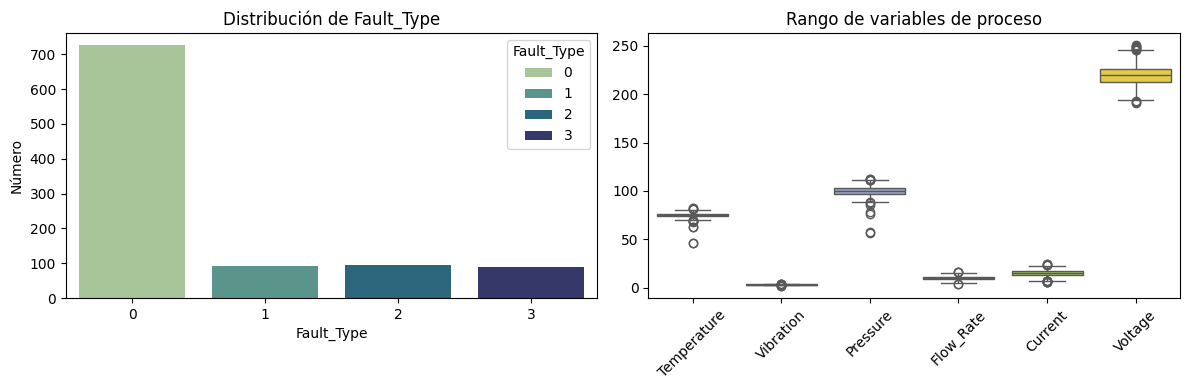

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x=y, ax=axes[0], palette="crest", hue=y)
axes[0].set_title("Distribución de Fault_Type")
axes[0].set_xlabel("Fault_Type")
axes[0].set_ylabel("Número")

sns.boxplot(
    data=df_clean[[
        "Temperature",
        "Vibration",
        "Pressure",
        "Flow_Rate",
        "Current",
        "Voltage",
    ]],
    ax=axes[1],
    palette="Set2",
)
axes[1].set_title("Rango de variables de proceso")
axes[1].tick_params(axis="x", rotation=45)
plt.tight_layout()

- **`Fault_Type`**: La gran mayoría de registros son del tipo 0 (sin fallo o condición normal), mientras que los fallos 1, 2 y 3 son mucho menos frecuentes y están bastante equilibrados entre sí. Esto nos indica que hay un desbalanceo de clases, por lo que se debe tener en cuenta para que el modelo no genere una tendencia a predecir la clase 0.

- **Variables de proceso**:
    - Cada variable se encuentra en un rango distinto (Voltage ≈ 190–250, Pressure ≈ 60–115, Temperature ≈ 45–80, etc.), esto justifica la necesidad de escalar todas las variables numéricas para evitar que unas tomen más importancia que otras.
    - Se observa cierta variabilidad interna y presencia de outliers, especialmente en Pressure y Temperature.

### Correlación de variables clave


Identificamos correlaciones entre las variables de proceso originales (sin incluir FFT) para detectar redundancias.

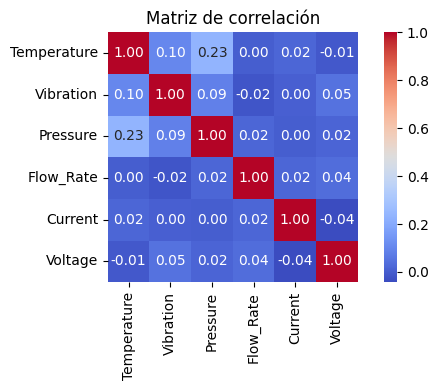

In [9]:
process_vars = [
    "Temperature",
    "Vibration",
    "Pressure",
    "Flow_Rate",
    "Current",
    "Voltage",]

corr = df_clean[process_vars].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de correlación")
plt.tight_layout()

- **Correlación**:
En este caso todos los coeficientes están muy cerca de 0, por lo que no existen relaciones lineales fuertes entre las variables.

### Distribuciones univariantes de variables de proceso


Histograma de las seis variables principales. Gracias a esto podemos buscar rangos, asimetrías y posibles outliers.

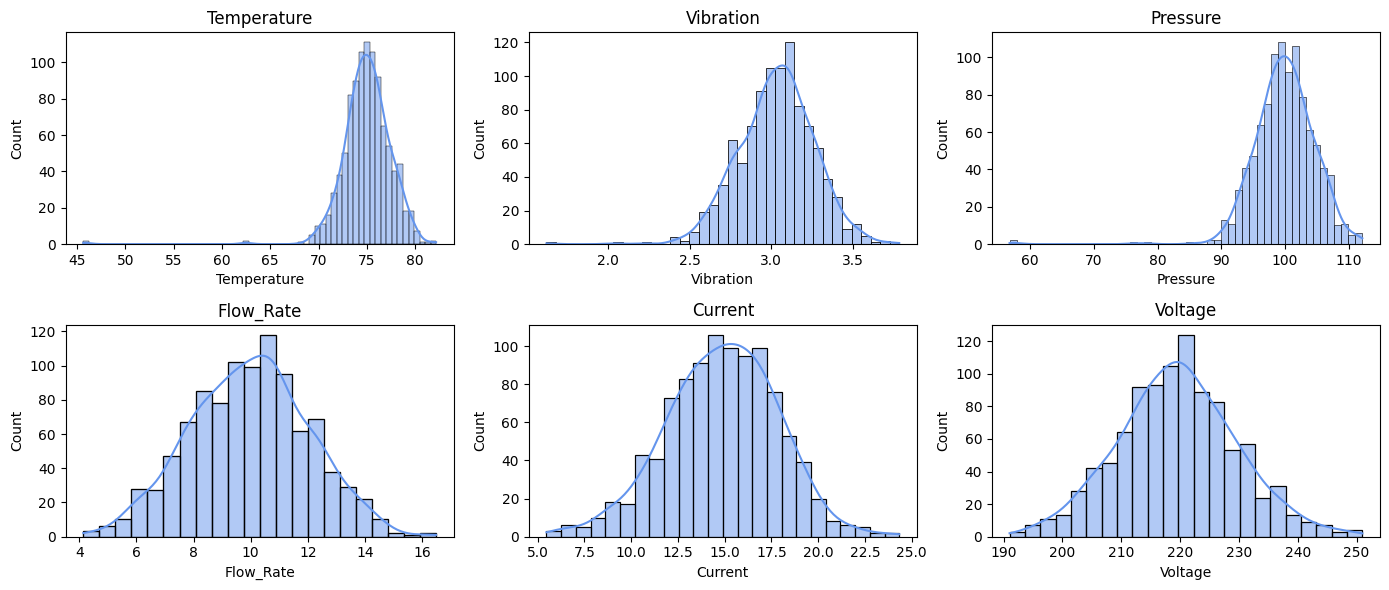

In [10]:
process_cols = [
    "Temperature",
    "Vibration",
    "Pressure",
    "Flow_Rate",
    "Current",
    "Voltage",
]

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
for ax, col in zip(axes.flatten(), process_cols):
    sns.histplot(df_clean[col], kde=True, ax=ax, color="cornflowerblue")
    ax.set_title(col)
plt.tight_layout()

Se puede ver que todas las variables tienen rangos estrechos y bien acotados. Las distribuciones son casi simétricas salvo por algunos sesgos muy pequeños, además no se observan colas extremas masivas. Probablemente se deba a que el dataset está generado de forma sintética. Confirmamos de forma visual que hay outliers en Temperature y Pressure, y podemos observar que Vibration también tiene algunos valores que se salen de la distribución.

### Outliers en variables de proceso
Siguiendo la regla del 1.5 IQR.

In [11]:
outlier_counts = {}
for col in process_cols:
    q1, q3 = df_clean[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outlier_counts[col] = int(((df_clean[col] < lower) | (df_clean[col] > upper)).sum())

pd.Series(outlier_counts, name="outliers_1.5IQR")

Temperature    13
Vibration      11
Pressure       12
Flow_Rate       5
Current        13
Voltage        11
Name: outliers_1.5IQR, dtype: int64

Hay muy pocos valores fuera de rango por IQR. Esto no justifica hacer un recorte ya que pueden deberse a valores normales.

### Balance de clases y medias por clase

In [12]:
class_counts = df_clean["Fault_Type"].value_counts().sort_index()
class_pct = (class_counts / len(df_clean) * 100).round(2)

class_summary = pd.DataFrame({"count": class_counts, "%": class_pct})
print("Distribución de Fault_Type (%):\n", class_summary)

means_by_class = df_clean.groupby("Fault_Type")[process_cols].mean().round(3)
print("\nMedias por clase (variables de proceso):\n", means_by_class)

Distribución de Fault_Type (%):
             count     %
Fault_Type             
0             725  72.5
1              91   9.1
2              95   9.5
3              89   8.9

Medias por clase (variables de proceso):
             Temperature  Vibration  Pressure  Flow_Rate  Current  Voltage
Fault_Type                                                               
0                74.978      3.028    99.896      9.972   14.865  219.414
1                75.172      3.024   100.364     10.307   15.044  220.338
2                74.738      3.076   100.300      9.823   14.544  220.207
3                75.345      3.025    99.494      9.686   14.878  218.953


Como ya se ha mencionado anteriormente, Fault_Type está desbalanceado. Requiere estratificación (ya aplicada) y métricas que penalicen a la clase mayoritaria. Las medias por clase nos permiten detectar desplazamientos medios. En este caso los contrastes parecen sutiles, sugiriendo que los FFT o las interacciones pueden aportar más señal que las medias simples.

### Asociación univariante feature-objetivo (ANOVA f_classif)

In [13]:
from sklearn.feature_selection import f_classif

X_all = df_clean.drop(columns=["Fault_Type"])
y_all = df_clean["Fault_Type"]

f_scores, pvals = f_classif(X_all, y_all)
f_table = (
    pd.DataFrame({"feature": X_all.columns, "f_score": f_scores, "pvalue": pvals})
    .sort_values("f_score", ascending=False)
    .reset_index(drop=True)
)

f_table.head(10)

,feature,f_score,pvalue
0,FFT_Temp_8,1.8714,0.1327
1,FFT_Temp_2,1.8714,0.1327
2,FFT_Pres_6,1.7463,0.1559
3,FFT_Pres_4,1.7463,0.1559
4,Flow_Rate,1.5397,0.2026
5,FFT_Pres_5,1.5093,0.2105
6,FFT_Temp_6,1.4183,0.2359
7,FFT_Temp_4,1.4183,0.2359
8,Vibration,1.3184,0.2670
9,FFT_Vib_3,1.2391,0.2943


Las 10 mejores features tienen F-scores bajos (1.3-1.9) y p-values > 0.13, lo que indica señal univariante débil. Esto nos sugiere que la separabilidad puede depender de combinaciones multivariantes o métodos no lineales.

## PCA
Reducir dimensionalidad de las 30 componentes FFT conservando el 99% de la varianza para simplificar modelos y mitigar colinealidad.

In [14]:
from sklearn.decomposition import PCA

fft_cols = [c for c in df_clean.columns if c.startswith("FFT_")]

pca = PCA(n_components=0.99)
pca.fit(df_clean[fft_cols])

print(f"Componentes FFT: {len(fft_cols)}")
print(f"Componentes PCA para 99% varianza: {pca.n_components_}")
print("Varianza explicada acumulada (primeros 10):")
print(np.round(pca.explained_variance_ratio_[:10].cumsum(), 4))

Componentes FFT: 30
Componentes PCA para 99% varianza: 10
Varianza explicada acumulada (primeros 10):
[0.8453 0.8739 0.8981 0.9202 0.9403 0.9589 0.9749 0.9809 0.9864 0.9915]


PCA sobre las 30 FFT requiere pocos componentes (tan solo 10) para explicar el 99% de la varianza. Esto nos permite añadir una rama en el pipeline que reemplace los FFT originales por sus componentes PCA.

# Clustering

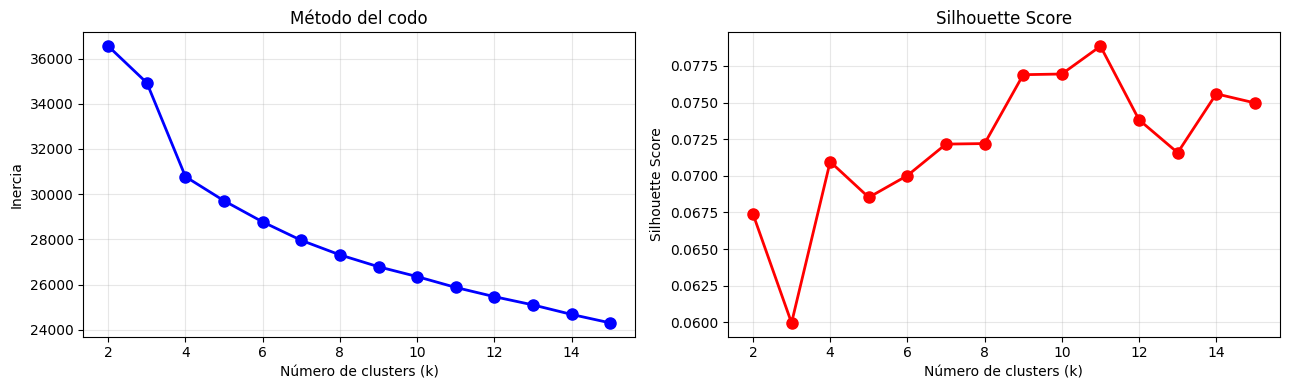

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt

# Preparar datos para clustering, sin etiqueta y normalizados
X_cluster = df_clean.drop(columns=["Fault_Type"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determinar número óptimo de clusters con K-Means usando método del codo y silhouette score
inertias = []
silhouette_scores = []
K_range = range(2, 15+1)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=21)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Método del codo
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de clusters (k)')
axes[0].set_ylabel('Inercia')
axes[0].set_title('Método del codo')
axes[0].grid(True, alpha=0.3)

# Silhouette score
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

In [16]:
# Probamos distintos algoritmos de clustering: K-Means vs DBSCAN vs AgglomerativeClustering
best_k = 4 

algorithms = {
    'K-Means': KMeans(n_clusters=best_k, n_init=10),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=best_k),
    'DBSCAN': DBSCAN(eps=2.5) 
}

results = {}
for name, model in algorithms.items():
    labels = model.fit_predict(X_scaled)
    df_clean[f'Cluster_{name}'] = labels

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # Excluir ruido si DBSCAN
    
    sil_score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else np.nan
    db_score = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else np.nan
    adj_rand_score = adjusted_rand_score(df_clean['Fault_Type'], labels) if len(set(labels)) > 1 else np.nan
    nor_mut_info_score = normalized_mutual_info_score(df_clean['Fault_Type'], labels) if len(set(labels)) > 1 else np.nan
    
    results[name] = {
        'n_clusters': n_clusters,
        'n_noise': list(labels).count(-1) if name == 'DBSCAN' else 0,
        'silhouette': sil_score,
        'davies_bouldin': db_score,
        'adjusted_rand': adj_rand_score,
        'normalized_mutual_info': nor_mut_info_score
    }

results_df = pd.DataFrame(results).T
print(results_df)

                         n_clusters  n_noise  silhouette  davies_bouldin  \
K-Means                         4.0      0.0      0.0557          2.8801   
AgglomerativeClustering         4.0      0.0      0.0370          3.5180   
DBSCAN                          1.0    995.0      0.5943          0.3956   

                         adjusted_rand  normalized_mutual_info  
K-Means                         0.0001                  0.0038  
AgglomerativeClustering         0.0004                  0.0069  
DBSCAN                         -0.0021                  0.0025  


Como podemos ver en los resultados del clustering, ningún algoritmo consigue hacer clusters de calidad. DBSCAN clasifica casi todo el dataset como ruido. Los valores de Silhouette bajos y Davies-Bouldin altos (DBSCAN da mejores valores, pero es porque está todo en el cluster de ruido), nos indican que los clusters no están bien separados. El adjusted rand index nos confirma que los clusters no agrupan los elementos con respecto a su clase (el tipo de fallo) y el normalized mutual information nos confirma que los clusters no tienen información que ayude a predecir la clase. Con esto confirmamos que el dataset no contiene patrones útiles a la hora de predecir el tipo de fallo.

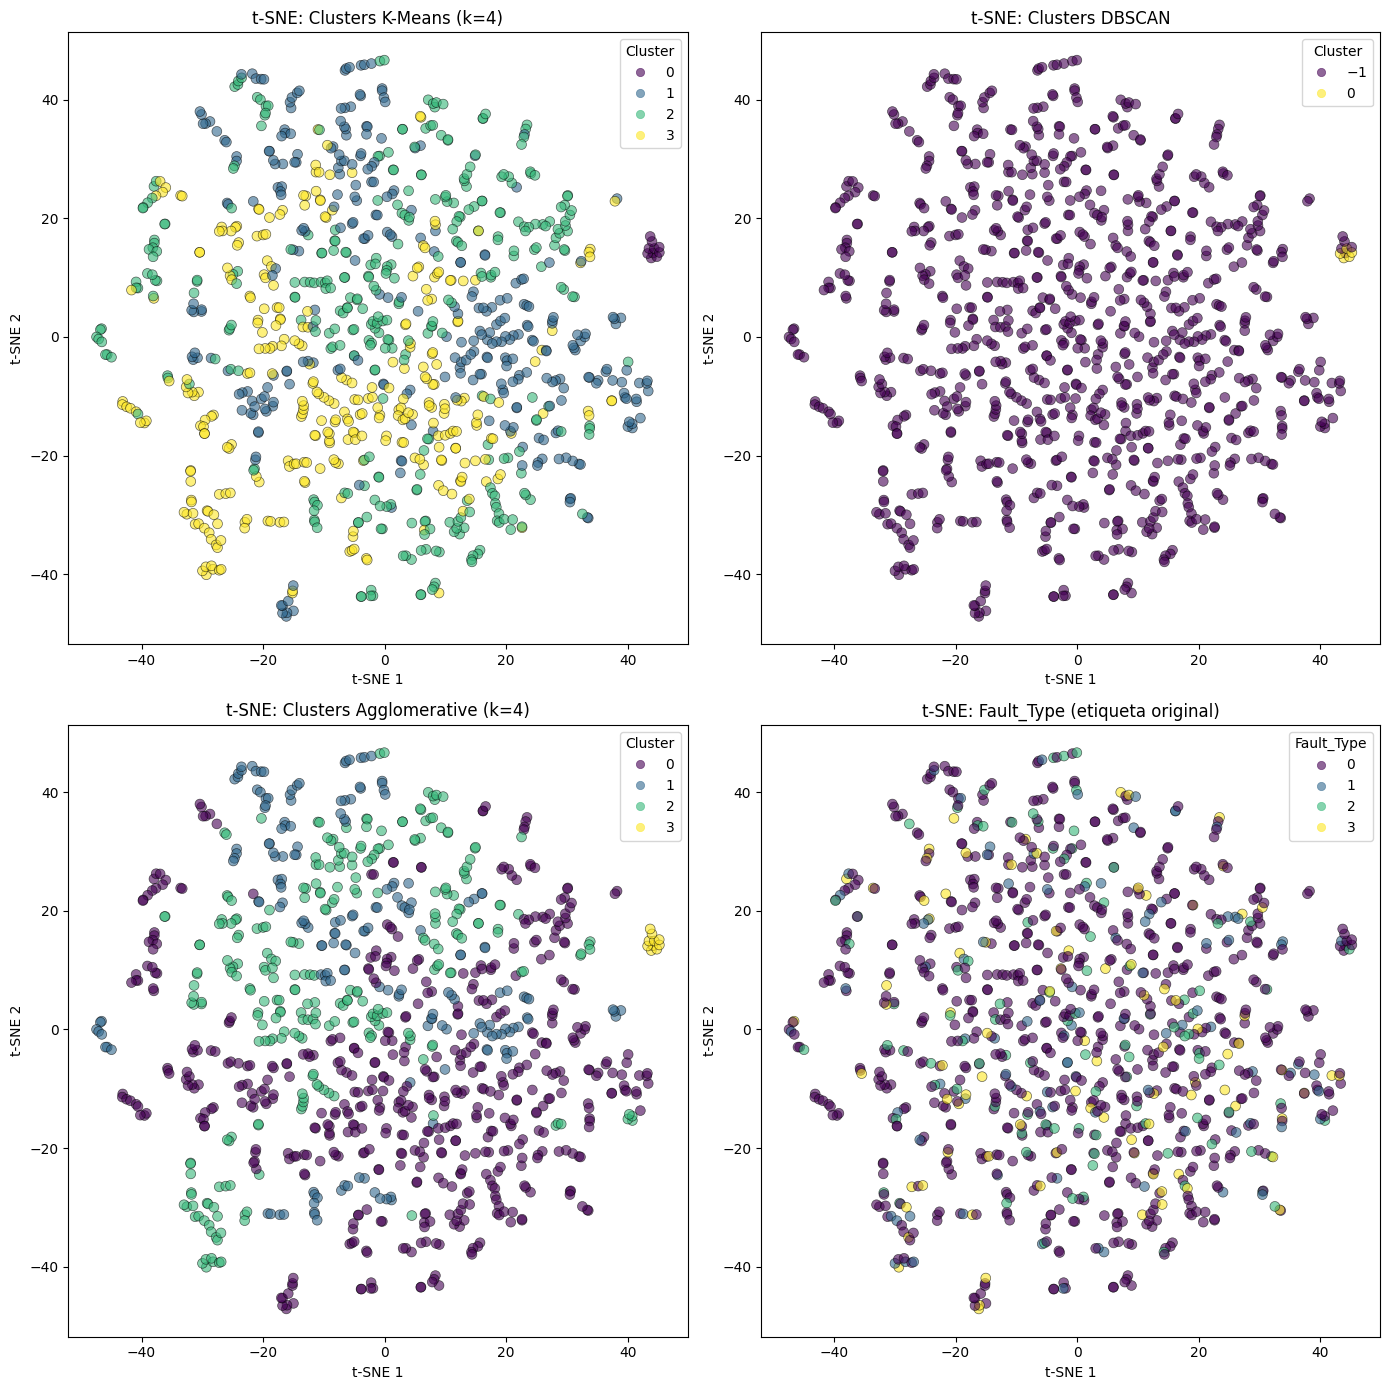

In [17]:
# Visualización con t-SNE para reducir dimensiones a 2D
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Kmeans
scatter1 = axes[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                           c=df_clean['Cluster_K-Means'], 
                           alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0, 0].set_title(f't-SNE: Clusters K-Means (k={best_k})')
axes[0, 0].set_xlabel('t-SNE 1')
axes[0, 0].set_ylabel('t-SNE 2')
axes[0, 0].legend(*scatter1.legend_elements(), title='Cluster')

# Dbscan
scatter2 = axes[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                           c=df_clean['Cluster_DBSCAN'], 
                           alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0, 1].set_title('t-SNE: Clusters DBSCAN')
axes[0, 1].set_xlabel('t-SNE 1')
axes[0, 1].set_ylabel('t-SNE 2')
axes[0, 1].legend(*scatter2.legend_elements(), title='Cluster')

# AgglomerativeClustering
scatter3 = axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                           c=df_clean['Cluster_AgglomerativeClustering'], 
                           alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[1, 0].set_title(f't-SNE: Clusters Agglomerative (k={best_k})')
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')
axes[1, 0].legend(*scatter3.legend_elements(), title='Cluster')

# Por Fault_Type
scatter4 = axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                           c=df_clean['Fault_Type'], 
                           alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[1, 1].set_title('t-SNE: Fault_Type (etiqueta original)')
axes[1, 1].set_xlabel('t-SNE 1')
axes[1, 1].set_ylabel('t-SNE 2')
axes[1, 1].legend(*scatter4.legend_elements(), title='Fault_Type')

plt.tight_layout()